
### Source code for this blog post 
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/) is a link to the source code for this Penguin Classification blog post.

### Reference for this blog post
[Here](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-penguins.html) is a link to the main reference we are using when creating this blog post.

# Introduction.
In this blog post I am going to use standard libraries to classify Palmer Penguins using supervised learning. 



Our goal is to classify three types of penguins, `Adelie`, `Chinstrap`, and `Gentoo`. Let's begin!

In [1]:
%load_ext autoreload
%autoreload 2

First, let's import some libraries, and let us load in the data using the function `read_csv`. 

We also need to import the class `PG` from our `penguins.py` source file.

In [2]:
# from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)
import numpy as np
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
np.seterr(all="ignore")
import pandas as pd

In [3]:
train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

In [8]:
from penguins import PG 
PG = PG(train["Species"])

Let us use the `prepare_data` function to generate our training data, and this function is simply a collection of several lines of code that we would like to run first after read in the raw data, and the most convenient way is to put those steps into a function.  

In [9]:
X_train, y_train = PG.prepare_data(train)  

In [10]:
X_train.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'Island_Biscoe', 'Island_Dream', 'Island_Torgersen',
       'Stage_Adult, 1 Egg Stage', 'Clutch Completion_No',
       'Clutch Completion_Yes', 'Sex_FEMALE', 'Sex_MALE'],
      dtype='object')

# Choosing Features

In [6]:
all_qual_cols = ["Clutch Completion", "Sex"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']

In [11]:
PG.select_combin(df=X_train, all_qual_cols=all_quant_cols, all_quant_cols=all_quant_cols)

['Culmen Length (mm)', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Culmen Length (mm)', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']
['Culmen Depth (mm)', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Culmen Depth (mm)', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Culmen Depth (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']
['Flipper Length (mm)', 'Culmen Length (mm)', 'Culmen Depth (mm)']
['Flipper Length (mm)', 'Culmen Length (mm)', 'Flipper Length (mm)']
['Flipper Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']


# Model Choices

In [13]:
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)
X_test, y_test = PG.prepare_data(test)

In [22]:
# this counts as 3 features because the two Clutch Completion 
# columns are transformations of a single original measurement. 
# you should find a way to automatically select some better columns
# as suggested in the code block above
cols = ["Flipper Length (mm)", "Body Mass (g)", "Clutch Completion_No", "Clutch Completion_Yes"]
cols = ['Flipper Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'] 

LR = LogisticRegression()
LR.fit(X_train[cols], y_train)
LR.score(X_test[cols], y_test) 

0.8676470588235294

In [23]:
LR.score(X_test[cols], y_test) 

0.8676470588235294

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


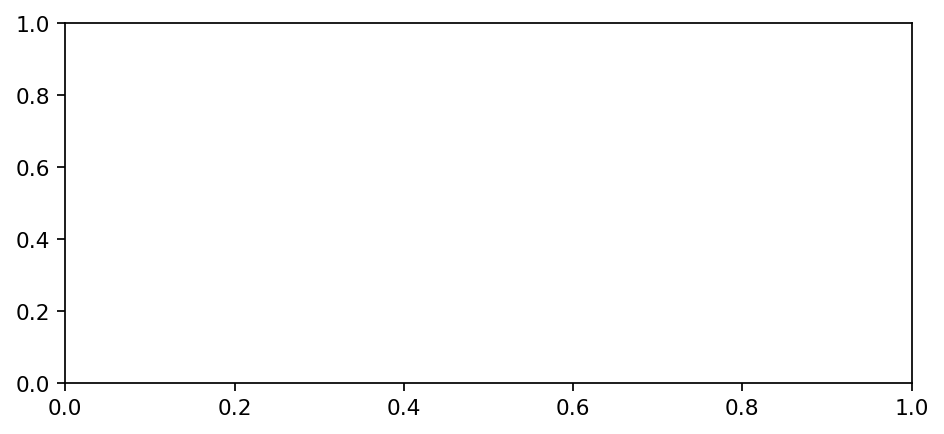

In [24]:
plt.rcParams["figure.figsize"] = (4,4)
plt.rcParams['figure.dpi'] = 156
PG.plot_regions(LR, X_test[cols], y_test)